<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Generate-synthetic-data" data-toc-modified-id="Generate-synthetic-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate synthetic data</a></span></li><li><span><a href="#Fitting-with-least-squares-optimisation" data-toc-modified-id="Fitting-with-least-squares-optimisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting with least-squares optimisation</a></span></li><li><span><a href="#Getting-the-analytical-expression-of-the-Jacobian" data-toc-modified-id="Getting-the-analytical-expression-of-the-Jacobian-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Getting the analytical expression of the Jacobian</a></span></li><li><span><a href="#Providing-the-Jocabian" data-toc-modified-id="Providing-the-Jocabian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Providing the Jocabian</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Computing the Jacobian with `SymPy`
</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import sympy as sym

# Generate synthetic data
<hr style = "border:2px solid black" ></hr>

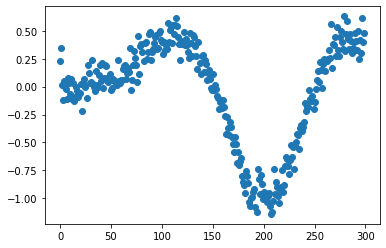

In [2]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
     161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]

y = [0.23, 0.35, 0.01, -0.12, 0.05, 0.0, -0.02, -0.11, 0.08, 0.03, -0.07, 0.07, -0.11, 0.03, -0.13, -0.09, 0.0, -0.04, -0.09, -0.07, -0.06, 0.02, -0.22, 0.03, 0.07, 0.0, -0.1, 0.19, 0.12, 0.03, 0.04, 0.24, 0.02, -0.0, -0.04, 0.14, 0.01, -0.0, 0.1, 0.19, 0.05, 0.21, -0.01, 0.08, 0.19, 0.18, 0.08, 0.04, 0.06, 0.11, -0.03, -0.01, 0.07, 0.05, 0.05, 0.03, 0.01, 0.24, 0.05, 0.03, 0.06, 0.06, 0.16, 0.18, 0.19, 0.07, 0.12, 0.17, 0.13, 0.35, -0.03, 0.06, 0.19, 0.32, 0.26, 0.19, 0.04, 0.45, 0.11, 0.36, 0.38, 0.31, 0.23, 0.39, 0.4, 0.25, 0.31, 0.47, 0.49, 0.24, 0.31, 0.34, 0.39, 0.44, 0.46, 0.34, 0.35, 0.48, 0.5, 0.42, 0.4, 0.29, 0.4, 0.33, 0.37, 0.34, 0.57, 0.4, 0.51, 0.53, 0.39, 0.55, 0.47, 0.55, 0.61, 0.54, 0.44, 0.38, 0.24, 0.41, 0.38, 0.38, 0.49, 0.37, 0.43, 0.37, 0.31, 0.26, 0.48, 0.39, 0.27, 0.46, 0.44, 0.36, 0.27, 0.16, 0.4, 0.21, 0.11, 0.27, 0.28, 0.13, 0.24, 0.2, 0.06, 0.12, 0.15, 0.07, -0.01, -0.03, 0.11, -0.03, 0.01, -0.02, -0.08, -
     0.1, -0.2, -0.14, -0.13, -0.19, -0.12, -0.18, -0.26, -0.42, -0.27, -0.37, -0.43, -0.32, -0.36, -0.45, -0.51, -0.59, -0.45, -0.51, -0.68, -0.59, -0.7, -0.67, -0.64, -0.8, -0.85, -0.88, -0.95, -0.76, -0.8, -0.86, -1.03, -1.07, -1.0, -0.99, -0.94, -0.92, -1.08, -1.12, -0.74, -0.83, -0.96, -0.79, -0.87, -1.01, -0.94, -0.95, -1.0, -1.03, -0.98, -0.95, -1.07, -1.14, -1.12, -1.02, -0.74, -0.96, -0.85, -0.9, -0.98, -1.04, -0.93, -0.9, -0.75, -0.94, -0.88, -0.71, -0.63, -0.65, -0.71, -0.78, -0.66, -0.52, -0.63, -0.54, -0.74, -0.53, -0.5, -0.42, -0.43, -0.56, -0.37, -0.34, -0.4, -0.36, -0.32, -0.15, -0.22, -0.18, -0.18, -0.03, -0.11, -0.13, -0.08, -0.2, -0.14, -0.02, 0.06, 0.14, 0.04, 0.22, 0.15, -0.01, 0.2, 0.25, 0.14, 0.23, 0.23, 0.25, 0.33, 0.26, 0.56, 0.17, 0.38, 0.37, 0.44, 0.27, 0.53, 0.33, 0.27, 0.44, 0.5, 0.4, 0.34, 0.63, 0.32, 0.47, 0.59, 0.43, 0.34, 0.47, 0.41, 0.3, 0.35, 0.4, 0.48, 0.41, 0.33, 0.5, 0.25, 0.42, 0.3, 0.61, 0.4, 0.48]

plt.scatter(x, y)
plt.show()

# Fitting with least-squares optimisation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Starting from an initial guess p0 = [mu0, sigma0] the optimiser will try to minimize the function f iteratively. - The gradient descent will approximate the partial derivatives of f in a point [mu, sigma] using FDs.
- This is expensive and each variables needs two calls of the function if a 2-points FD is used, as it is the default in `optimize.leastsq`.
    
</font>
</div>    

In [3]:
def second_derivative_gaussian(x, mu, sigma):
    """
    Second derivative Gaussian to be fitted
    Any other polnomial would have worked equally well!
    """
    return (1 / (sigma**2)) * (-sigma ** 2 + (x - mu) ** 2) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


def f(p, x, y):
    return y - second_derivative_gaussian(x, *p)


p0 = np.array([len(x)/2, 30.], dtype=np.float64)
params_est, _ = optimize.leastsq(
    f,
    p0,
    args=(x, y),
    full_output=False,
)

print(params_est)

[200.84118964  50.02549059]


# Getting the analytical expression of the Jacobian
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- As or function is defined analytically, we can compute offline all the partial derivatives of function f to compose the Jacobian matrix. 
- Generally computing the partial derivatives in the Jacobian is a long and error-prone process.
-Thankfully we can use `sympy` symbolic automatic differenciation functionality to constract the Jacobian.

</font>
</div>

In [4]:
x = sym.Symbol('x')
mu = sym.Symbol('mu')
sigma = sym.Symbol('sigma')
y = sym.Symbol('y')

In [5]:
def second_derivative_gaussian_sympy(x, mu, sigma):
    """
    Same function but we replaced 'np.exp' by 'sym.exp'
    """
    a = (1 / (sigma**2)) * (-sigma ** 2 + (x - mu) ** 2) * \
        sym.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return a

<div class="alert alert-info">
<font color=black>

- Why did we feed the error?
- The derivative of y will be zero, but the nagative in fron of our funciton is important.

</font>
</div>

In [6]:
error =  y - second_derivative_gaussian_sympy(x, mu, sigma)

# Let's print the Jacobian
for var in [mu, sigma]:
    error_prime = error.diff(var)
    print(sym.simplify(error_prime))
    print("*****")

(2*sigma**2*(-mu + x) - (mu - x)*(sigma**2 - (mu - x)**2))*exp(-(mu - x)**2/(2*sigma**2))/sigma**4
*****
3*(mu - x)**2*exp(-(mu - x)**2/(2*sigma**2))/sigma**3 - (mu - x)**4*exp(-(mu - x)**2/(2*sigma**2))/sigma**5
*****


In [8]:
y

y

In [9]:
second_derivative_gaussian_sympy(x, mu, sigma)

(-sigma**2 + (-mu + x)**2)*exp(-(-mu + x)**2/(2*sigma**2))/sigma**2

# Providing the Jocabian
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- In this optimisation, one call to the function f_prime replaces four calls to the function f.
- For small data and easy function this would not result in a massive improvement, but for more challenging one it is most definetly an advantage.

</font>
</div>

In [16]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
     161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]

y = [0.23, 0.35, 0.01, -0.12, 0.05, 0.0, -0.02, -0.11, 0.08, 0.03, -0.07, 0.07, -0.11, 0.03, -0.13, -0.09, 0.0, -0.04, -0.09, -0.07, -0.06, 0.02, -0.22, 0.03, 0.07, 0.0, -0.1, 0.19, 0.12, 0.03, 0.04, 0.24, 0.02, -0.0, -0.04, 0.14, 0.01, -0.0, 0.1, 0.19, 0.05, 0.21, -0.01, 0.08, 0.19, 0.18, 0.08, 0.04, 0.06, 0.11, -0.03, -0.01, 0.07, 0.05, 0.05, 0.03, 0.01, 0.24, 0.05, 0.03, 0.06, 0.06, 0.16, 0.18, 0.19, 0.07, 0.12, 0.17, 0.13, 0.35, -0.03, 0.06, 0.19, 0.32, 0.26, 0.19, 0.04, 0.45, 0.11, 0.36, 0.38, 0.31, 0.23, 0.39, 0.4, 0.25, 0.31, 0.47, 0.49, 0.24, 0.31, 0.34, 0.39, 0.44, 0.46, 0.34, 0.35, 0.48, 0.5, 0.42, 0.4, 0.29, 0.4, 0.33, 0.37, 0.34, 0.57, 0.4, 0.51, 0.53, 0.39, 0.55, 0.47, 0.55, 0.61, 0.54, 0.44, 0.38, 0.24, 0.41, 0.38, 0.38, 0.49, 0.37, 0.43, 0.37, 0.31, 0.26, 0.48, 0.39, 0.27, 0.46, 0.44, 0.36, 0.27, 0.16, 0.4, 0.21, 0.11, 0.27, 0.28, 0.13, 0.24, 0.2, 0.06, 0.12, 0.15, 0.07, -0.01, -0.03, 0.11, -0.03, 0.01, -0.02, -0.08, -
     0.1, -0.2, -0.14, -0.13, -0.19, -0.12, -0.18, -0.26, -0.42, -0.27, -0.37, -0.43, -0.32, -0.36, -0.45, -0.51, -0.59, -0.45, -0.51, -0.68, -0.59, -0.7, -0.67, -0.64, -0.8, -0.85, -0.88, -0.95, -0.76, -0.8, -0.86, -1.03, -1.07, -1.0, -0.99, -0.94, -0.92, -1.08, -1.12, -0.74, -0.83, -0.96, -0.79, -0.87, -1.01, -0.94, -0.95, -1.0, -1.03, -0.98, -0.95, -1.07, -1.14, -1.12, -1.02, -0.74, -0.96, -0.85, -0.9, -0.98, -1.04, -0.93, -0.9, -0.75, -0.94, -0.88, -0.71, -0.63, -0.65, -0.71, -0.78, -0.66, -0.52, -0.63, -0.54, -0.74, -0.53, -0.5, -0.42, -0.43, -0.56, -0.37, -0.34, -0.4, -0.36, -0.32, -0.15, -0.22, -0.18, -0.18, -0.03, -0.11, -0.13, -0.08, -0.2, -0.14, -0.02, 0.06, 0.14, 0.04, 0.22, 0.15, -0.01, 0.2, 0.25, 0.14, 0.23, 0.23, 0.25, 0.33, 0.26, 0.56, 0.17, 0.38, 0.37, 0.44, 0.27, 0.53, 0.33, 0.27, 0.44, 0.5, 0.4, 0.34, 0.63, 0.32, 0.47, 0.59, 0.43, 0.34, 0.47, 0.41, 0.3, 0.35, 0.4, 0.48, 0.41, 0.33, 0.5, 0.25, 0.42, 0.3, 0.61, 0.4, 0.48]


In [24]:
def f_prime(p, x, y):
    mu, sigma = p
    return np.vstack([
        (2*sigma**2*(-mu + x) - (mu - x)*(sigma**2 - (mu - x)**2)) *
        np.exp(-(mu - x)**2/(2*sigma**2))/sigma**4,
        
        
        
        3*(mu - x)**2*np.exp(-(mu - x)**2/(2*sigma**2))/sigma**3 -
        (mu - x)**4*np.exp(-(mu - x)**2/(2*sigma**2))/sigma**5
    ]).T

In [25]:
params_est, _ = optimize.leastsq(
    f,
    p0,
    Dfun=f_prime,
    args=(x, y),
    full_output=False,
)

print(params_est)

[200.84118965  50.02549059]


# Conclusions
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-danger">
<font color=black>

- Need to check if you have to provide the derivative of the error or only of the evaluation funciton!

</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://vmartin.fr/automatic-jacobian-matrix-computation-with-sympy.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
- [SciPy: leastsq vs least_squares](https://stackoverflow.com/questions/41315270/scipy-leastsq-vs-least-squares)

</font>
</div>

# Requirements
<hr style = "border:2px solid black" ></hr>

In [13]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

numpy     : 1.21.6
autopep8  : 1.7.0
sympy     : 1.11.1
json      : 2.0.9
matplotlib: 3.5.3
scipy     : 1.7.3

